**Bivariate Exploratory Data Analysis (EDA)** exploring two variables at a time. It helps to understand the relationship between two variables and to identify the patterns in the data. In this notebook, I will be using the automobile dataset to perform bivariate EDA.

In [1]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 150

In [2]:
# loading data set as Pandas dataframe
df = pd.read_csv("./datasets/automobile.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# Data Cleaning

In [3]:
# Find out the number of values which are not numeric
df['price'].str.isnumeric().value_counts()

# List out the values which are not numeric
df['price'].loc[df['price'].str.isnumeric() == False]

#Setting the missing value to mean of price and convert the datatype to integer
price = df['price'].loc[df['price'] != '?']
price_mean = price.astype(int).mean()
df['price'] = df['price'].replace('?', price_mean).astype(int)
df['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

In [4]:
# Cleaning the horsepower field
df['horsepower'].str.isnumeric().value_counts()
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hp_mean = horsepower.astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',hp_mean).astype(int)
df['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int32

In [5]:
# Cleaning the Normalized losses field
df[df['normalized-losses']=='?'].count()
nl=df['normalized-losses'].loc[df['normalized-losses'] !='?'].count()
nmean=nl.astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',nmean).astype(int)
df['normalized-losses'].head()

0    164
1    164
2    164
3    164
4    164
Name: normalized-losses, dtype: int32

# Bivariate Analysis



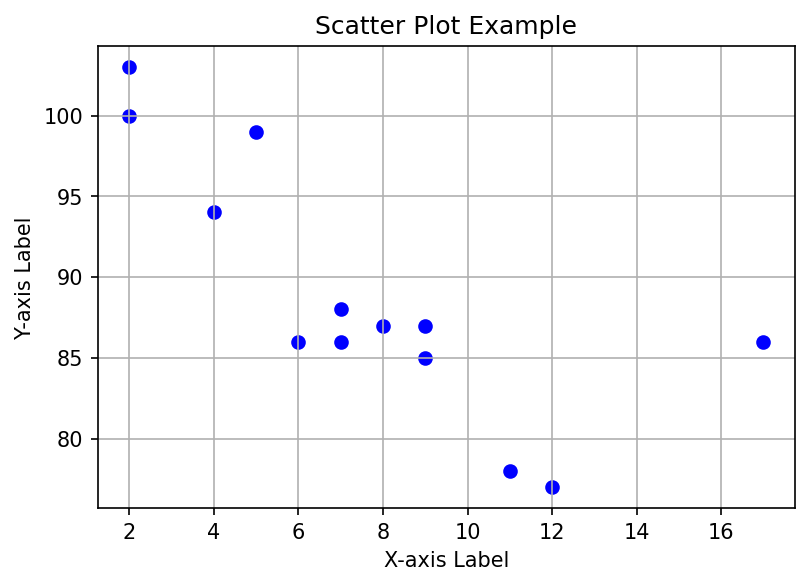

In [6]:
# Scatter plot simple example
# Example data
x = [5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6]
y = [99, 86, 87, 88, 100, 86, 103, 87, 94, 78, 77, 85, 86]

# Create a scatter plot
plt.scatter(x, y, color='blue', marker='o')  # 'o' represents the shape of the marker

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot Example')

# Add grid
plt.grid(True)

Text(0, 0.5, 'price')

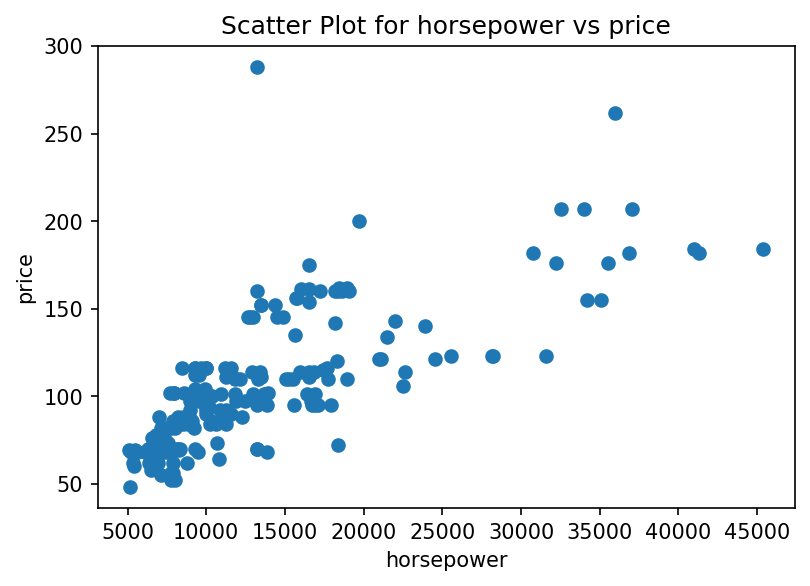

In [7]:
# plot the relationship between “horsepower” and “price”
plt.scatter(df["price"], df["horsepower"])
plt.title("Scatter Plot for horsepower vs price")
plt.xlabel("horsepower")
plt.ylabel("price")

<Axes: xlabel='engine-location', ylabel='price'>

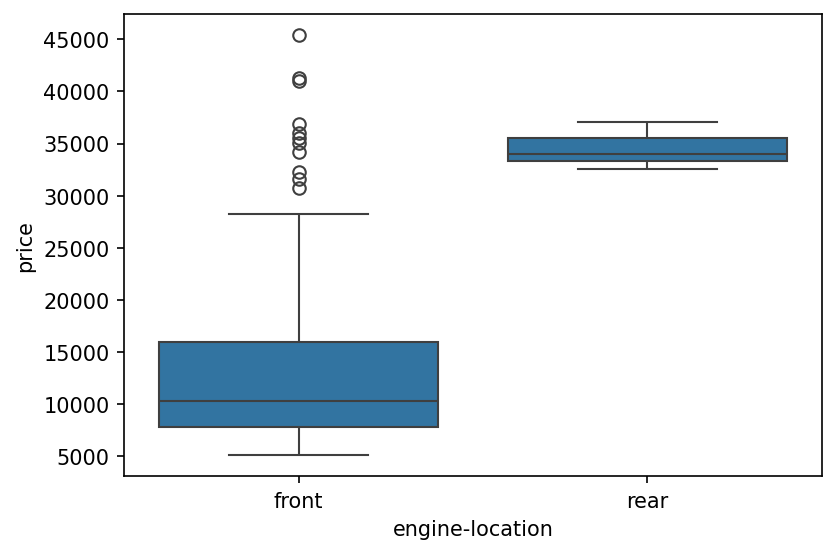

In [8]:
#boxplot
sns.boxplot(x="engine-location",y="price",data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

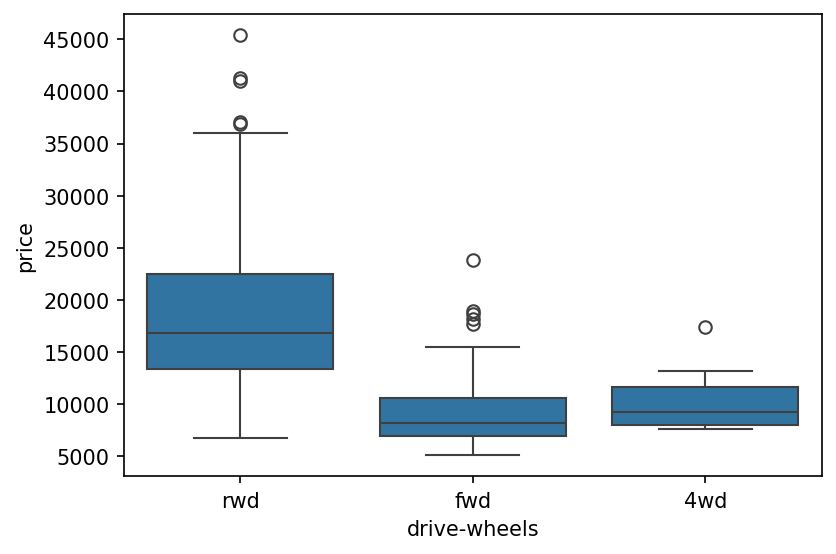

In [9]:
#boxplot to visualize the distribution of "price" with types of "drive-wheels"
sns.boxplot(x="drive-wheels", y="price",data=df)

Figure above illustrates the range of prices in cars with different wheel types. Boxplot shows the average and median price in respective wheel types and some outliers.

# Multivariate Analysis



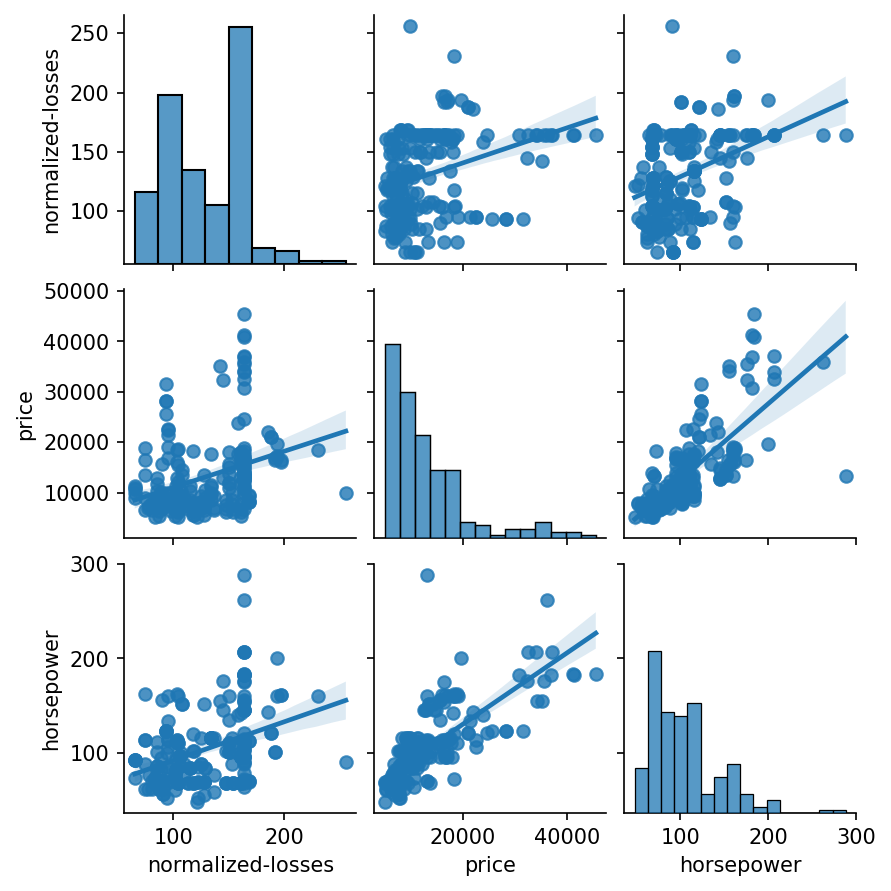

In [10]:
# pair plot with plot type regression
sns.pairplot(df,height=2, vars = ['normalized-losses', 'price','horsepower'],  kind="reg")

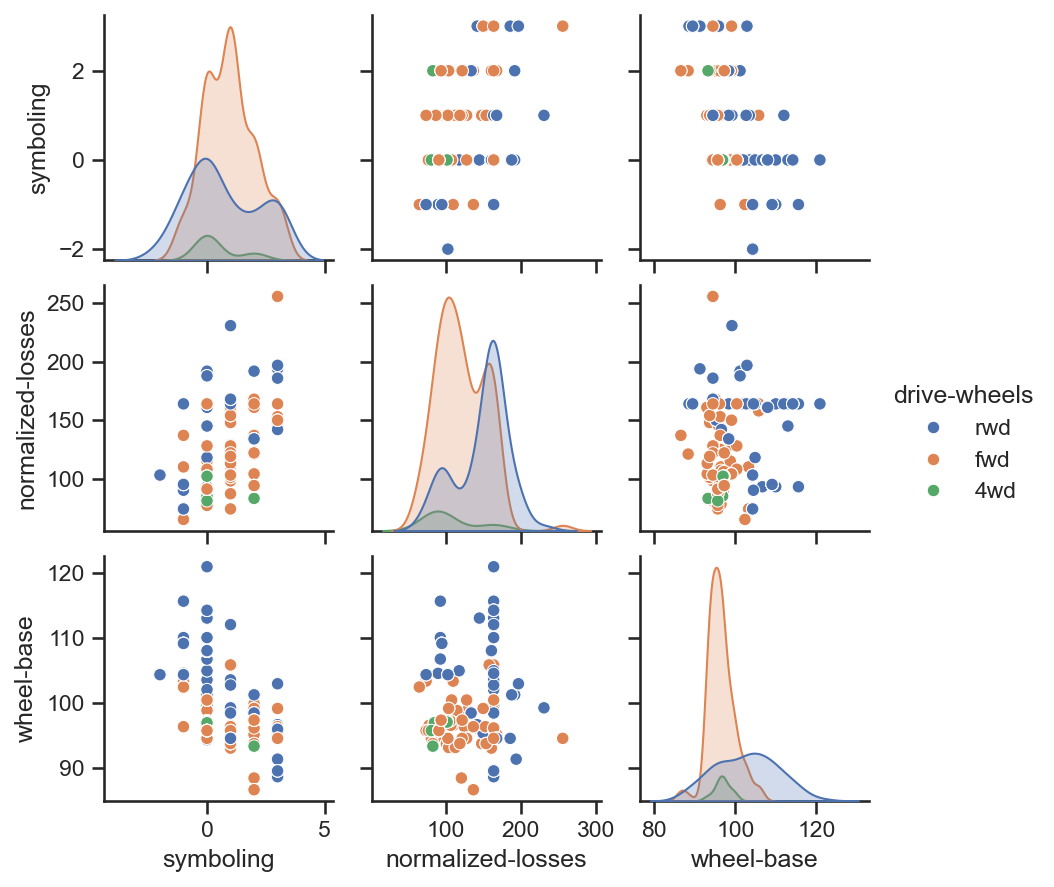

In [11]:
 #pair plot (matrix scatterplot) of few columns 
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,height=2,vars = ['symboling', 'normalized-losses','wheel-base'], hue="drive-wheels")

In [12]:
# Simple correlation example
from scipy import stats
# Create sample data
data = {
    'Height': [160, 165, 170, 175, 180],
    'Weight': [60, 60, 65, 75, 78]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate Pearson correlation coefficient
pearson_corr, _ = stats.pearsonr(df['Height'], df['Weight'])

print("Pearson correlation coefficient: {:.4f}".format(pearson_corr))

Pearson correlation coefficient: 0.9550


Pearson correlation coefficient indicates a strong positive linear relationship between height and weight in the sample data.

In [13]:
from scipy import stats

pearson_corr, _ = stats.pearsonr(df["price"], df["horsepower"])
print('Pearson corr:\t\t {:.4f}'.format(pearson_corr))


KeyError: 'price'

Here the correlation of these two variable is 0.76 which is close to +1 thus the price and horsepower are highly positively correlated. Using pandas corr() function correlation between entire numerical record can be calculated.

In [ ]:
df.corr(method='pearson', numeric_only=True)

Now let's visualize this correlation analysis with heatmap. Heatmap is best technique to make this look beautiful and easier to interpret.

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, cmap='YlOrBr', annot=True, fmt=".1f")
      

A coefficient close to 1 means that there’s a very strong positive correlation between the two variables. The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.

In [ ]:
# Simple Joint Plot Example

# Generate sample data
np.random.seed(0)
x = np.random.normal(size=100)
y = 2 * x + np.random.normal(size=100)

# Create a joint plot
sns.set(style="white", color_codes=True)
sns.jointplot(x=x, y=y, kind="scatter", color="skyblue", 
              marginal_kws=dict(bins=15, fill=True))

# Set plot labels and title
plt.xlabel('X Variable')
plt.ylabel('Y Variable')


In this example, we first generate sample data where the variable x follows a normal distribution and the variable y is linearly related to x with some added noise. Then, we use seaborn's jointplot function to create a joint plot of x and y. The kind="scatter" parameter specifies that we want a scatter plot to visualize the relationship between the two variables. Additionally, we set the number of bins for the histograms using the marginal_kws parameter.

The resulting joint plot provides insights into the relationship between x and y, including their individual distributions and the correlation between them.

In [ ]:
# Grouped Bar Plots example
# Sample data
data = {
    'Region': ['North', 'North', 'South', 'South', 'East', 'East'],
    'Quarter': ['Q1', 'Q2', 'Q1', 'Q2', 'Q1', 'Q2'],
    'Product_Category': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Sales': [100, 120, 80, 90, 110, 100]
}

df = pd.DataFrame(data)

# Create a grouped bar plot using Seaborn
sns.set(style="whitegrid")
sns.catplot(x="Region", y="Sales", hue="Quarter", col="Product_Category",
            data=df, kind="bar", height=4, aspect=0.7, palette="Set2")

# Add title and labels
#plt.suptitle('Sales Performance by Region and Quarter for Each Product Category')
plt.xlabel('Region')
plt.ylabel('Sales')

In this example, we have a DataFrame df containing information about sales data across different regions, quarters, and product categories. We use Seaborn's `catplot` function to create Grouped Bar Plots where each subplot represents the sales performance of a specific product category broken down by region and quarter. The hue parameter is used to differentiate quarters, and the col parameter separates the plots by product category.

This visualization allows us to compare the sales performance of different product categories across regions and quarters, helping us identify trends and patterns in the data. It's a powerful tool for gaining insights into the performance of various factors within a dataset.

<Figure size 1500x900 with 0 Axes>

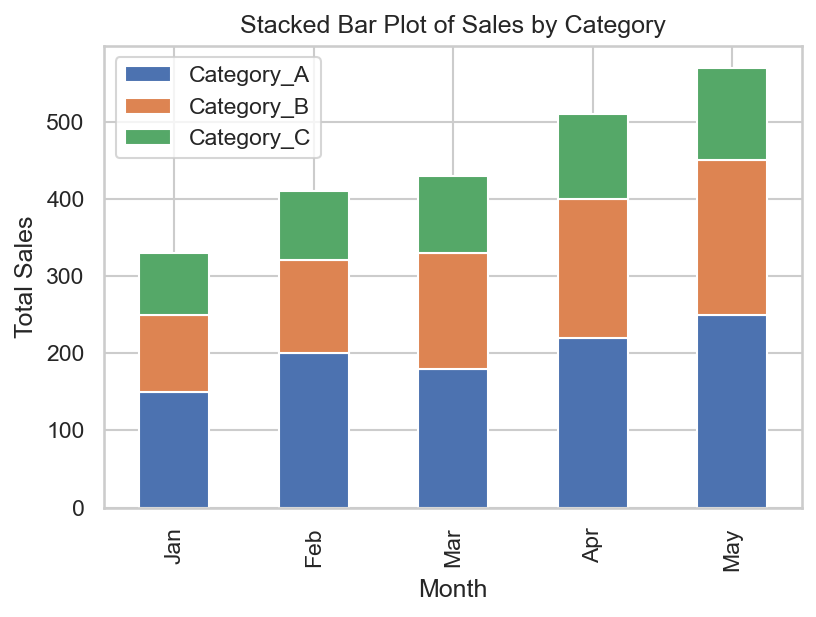

In [18]:
# Stacked Bar Plot Example
# Sample data
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May'],
    'Category_A': [150, 200, 180, 220, 250],
    'Category_B': [100, 120, 150, 180, 200],
    'Category_C': [80, 90, 100, 110, 120]
}

# Create a DataFrame
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

# Stacked bar plot
df.set_index('Month').plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Stacked Bar Plot of Sales by Category')
plt.legend()

In this example, the stacked bar plot illustrates the total sales (Category_A + Category_B + Category_C) for each month, and each category contributes a different color to the overall bar. The height of the entire bar represents the total sales, while the segments represent the contribution of each category to the total sales. This visualization allows for a quick comparison of the sales composition across different months and categories.

In [ ]:
# Create a box plot to visualize the distribution of total bill amounts 
# per day of the week
# Load a dataset from Seaborn
import seaborn as sns
tips = sns.load_dataset("tips")

# Create a box plot to visualize the distribution of total bill amounts
sns.boxplot(x="day", y="total_bill", data=tips)

# Add labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Total Bill ($)")
plt.title("Distribution of Total Bills by Day")

The `sns.boxplot()` function creates a collection of box plots where the x-axis represents the categorical variable "day" (i.e., Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday), and the y-axis represents the continuous variable "total_bill". Each box plot represents the distribution of total bill amounts for a specific day of the week.

By examining the box plots, we can observe any differences in the distribution of total bill amounts across different days. We can identify trends such as whether certain days tend to have higher or lower total bills, the variability in bills across days, and the presence of outliers within each category.